In [2]:
import pyximport; pyximport.install()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpld3
%matplotlib inline
mpld3.enable_notebook()

## Simple Perceptron Classifier

Sobre una cinta transportadora circulan naranjas y melones. Se busca obtener un clasificador de frutas que facilite su almacenamiento. Para cada fruta, se conoce su diámetro en centímetros y la intensidad de color naranja medida (entre 0% y 100%). Se recabaron las siguientes muestras como ejemplos de cada tipo de fruta:

$$
\begin{array}{|c|c|c|}
\hline Diámetro & Intensidad & Tipo \\
\hline 10 & 75\% & Naranja \\
\hline  8 & 60\% & Naranja \\
\hline  7 & 67\% & Naranja \\
\hline 15 & 95\% & Naranja \\
\hline 20 & 11\% & Melón \\
\hline 26 & 13\% & Melón \\
\hline 24 & 12.5\% & Melón \\
\hline 19 & 12\% & Melón \\
\hline 
\end{array}
$$

Entrene un perceptrón que permita resolver el problema.

Entrenando:


Entrenamiento finalizado en 2 iteraciones.
('W:', array([-36.,  51.]))
('b:', -1.0)
('T:', array([1, 1, 1, 1, 0, 0, 0, 0], dtype=int8))
('y:', array([1, 1, 1, 1, 0, 0, 0, 0], dtype=int8))


/home/raulparola/workplace/scripts/.venv/lib/python2.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.


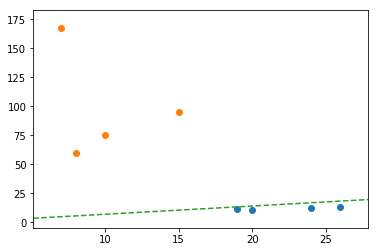

In [3]:
from utils.cperceptron import Perceptron
X = np.array([[10, 75], [8, 60], [7, 167], [15, 95],[20,11],[26,13],[24,12.5],[19,12]],dtype=np.float)
T = np.array([1,1,1,1,0,0,0,0],dtype=np.int8)

def progreso(perceptron, X, T, n):
    y = perceptron.evaluar(X)
    incorrectas = (T != y).sum()
    print("Pasos: {0}\tIncorrectas: {1}\ny = {2}\nt = {3}\n".format(n, incorrectas, y, T))


# Crea un perceptron con tantas entradas como columnas tiene X
p = Perceptron(X.shape[1])
p.reiniciar()
print("Entrenando:\n")
# n = p.entrenar_numpy(X, T, max_pasos=50000, callback=progreso, frecuencia_callback=10000)
n = p.entrenar(X, T, max_pasos=500, callback=progreso, frecuencia_callback=10)

print("\nEntrenamiento finalizado en {0} iteraciones.".format(n))
print("W:", p.W)
print("b:", p.b)

print("T:", T)
# print("y:", p.evaluar_numpy(X))
print("y:", p.evaluar(X))

p.visualizar(X, T)

Utilice el perceptrón entrenado para clasificar los siguientes ejemplos, verificando que los resultados obtenidos sean los correctos:
$$
\begin{array}{|c|c|c|}
\hline Diámetro & Intensidad & Tipo \\
\hline 12 & 80 & Naranja \\
\hline 23 & 15 & Melón \\
\hline 27 & 10 & Melón \\
\hline 11 & 80 & Naranja \\
\hline 
\end{array}
$$


In [4]:
test = np.array([[12,80],[23,15],[27,10],[11,80]],dtype=np.float)
p.evaluar(test)

array([1, 0, 0, 1], dtype=int8)